# Putting it All Together

For this last lesson, we'll practice going through a full workflow!

We'll answer the question:

## **What is the total grocery-store sales volume of each Census tract?**

## The Workflow

Here's a set of steps that we will implement in the labeled cells below:

**Importing Datasets**

- Read in the joined tracts/ACS data
- Read the grocery data CSV into a pandas DataFrame (it lives at `'../data/other/ca_grocery_stores_2019_wgs84.csv`).
- Convert it to a GeoDataFrame.
- Define its CRS (EPSG:4326).
- Transform it to match the CRS of `tracts_acs_gdf_ac`.
- Examine the transformed GeoDataFrame

**Spatial Join and Dissolve**

- Join the two datasets in such a way that you can then...
- Group by tract and calculate the total grocery-store sales volume.
- Don't forget to check the dimensions, contents, and any other relevant aspects of your results.

**Plot and Review**

- Plot the tracts, coloring them by total grocery-store sales volume.
- Plot the grocery stores on top.
- Bonus points for devising a nice visualization scheme that helps you heuristically check your results!

**We've written out some of the code for you, but you'll need to replace the ellipses with the correct
content.**

In [4]:
import pandas as pd
import geopandas as gpd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

## Importing Datasets

We first need to prepare our data by loading the joined tracts/ACS data and grocery data, and conduct our usual steps to make there they have the same CRS.

- Read in the joined tracts/ACS data
- Read the grocery data CSV into a pandas DataFrame (it lives at `'../data/other/ca_grocery_stores_2019_wgs84.csv`).
- Convert it to a GeoDataFrame.
- Define its CRS (EPSG:4326).
- Transform it to match the CRS of `tracts_acs_gdf_ac`.
- Examine the transformed GeoDataFrame

In [8]:
# Read in the joined tracts/ACS data
tracts_acs_gdf_ac = gpd.read_file('../data/outdata/tracts_acs_gdf_ac.json')

In [9]:
# Read the grocery data CSV into a pandas DataFrame
grocery_pts_df = pd.read_csv('../data/other/ca_grocery_stores_2019_wgs84.csv')

In [10]:
# Convert it to a GeoDataFrame
grocery_pts_gdf = gpd.GeoDataFrame(grocery_pts_df, 
                                   geometry=gpd.points_from_xy(grocery_pts_df.X, grocery_pts_df.Y))

In [11]:
# Define its CRS
# Use EPSG:4326
grocery_pts_gdf.crs = "epsg:4326"

In [12]:
# Transform it to match the CRS of tracts_acs_gdf_ac
grocery_pts_gdf.to_crs(tracts_acs_gdf_ac.crs, inplace=True)

In [13]:
# Examine transformed GeoDataFrame
grocery_pts_gdf.head()

,X,Y,OBJECTID,LOCNUM,CONAME,STREET,CITY,STATE,STATE_NAME,ZIP,...,EMPNUM,FRNCOD,ISCODE,SQFTCODE,LOC_NAME,STATUS,SCORE,SOURCE,REC_TYPE,geometry
0,-121.9200,36.5479,3302270,414460173,BIO-CHEK LLC,JUNIPERO AVE,CARMEL,CA,California,93923,...,17.0,NaN,NaN,4.0,StreetName,M,100.0,INFOGROUP,0,POINT (-121.92000 36.54790)
1,-121.9227,36.5530,11234928,729045978,OLIVIER NAPA VALLEY,NW SAN CARLOS ON OCEAN,CARMEL,CA,California,93921,...,6.0,NaN,NaN,3.0,Postal,M,100.0,INFOGROUP,0,POINT (-121.92270 36.55300)
2,-121.8099,36.5236,12186144,830486544,SAFEWAY,MID VALLEY CTR,CARMEL,CA,California,93923,...,52.0,V,NaN,7.0,StreetAddress,M,100.0,INFOGROUP,0,POINT (-121.80990 36.52360)
3,-121.9105,36.5367,76567,101734812,SAFEWAY,THE CROSSROADS BLVD,CARMEL,CA,California,93923,...,80.0,V,NaN,7.0,StreetAddress,M,100.0,INFOGROUP,0,POINT (-121.91050 36.53670)
4,-121.9050,36.5426,1352100,259197937,SAVE MART,CARMEL RANCHO BLVD,CARMEL,CA,California,93923,...,75.0,2,NaN,8.0,StreetAddress,M,100.0,INFOGROUP,0,POINT (-121.90500 36.54260)


## Spatial Join and Dissolve

Now that we have our data and they're in the same projection, we're going to conduct an *attribute join* to bring together the two datasets. From there we'll be able to actually *aggregate* our data to count the total sales volume.

Complete the following steps:

- Join the two datasets in such a way that you can then...
- Group by tract and calculate the total grocery-store sales volume.
- Don't forget to check the dimensions, contents, and any other relevant aspects of your results.

In [14]:
# Join the two datasets
tracts_joingrocery = gpd.sjoin(tracts_acs_gdf_ac, grocery_pts_gdf, how='left')

In [15]:
# Group by tract and calculate the total grocery-store sales volume
tracts_totsalesvol = tracts_joingrocery[['GEOID','geometry','SALESVOL']].dissolve(by='GEOID',
                                                                                  aggfunc="sum",
                                                                                  as_index=False)

In [16]:
# Don't forget to check the dimensions, contents, and any other relevant aspects of your results
print(f'Dimensions of result: {tracts_totsalesvol.shape}')
print(f'Dimesions of Census tracts: {tracts_acs_gdf_ac.shape}')

Dimensions of result: (361, 3)
Dimesions of Census tracts: (361, 54)


In [17]:
# Check the result
tracts_totsalesvol.head()

,GEOID,geometry,SALESVOL
0,06001400100,"POLYGON ((-122.24692 37.88544, -122.24197 37.8...",0.0
1,06001400200,"POLYGON ((-122.25508 37.84607, -122.25245 37.8...",53470.0
2,06001400300,"POLYGON ((-122.26416 37.84000, -122.26186 37.8...",0.0
3,06001400400,"POLYGON ((-122.26180 37.84179, -122.26130 37.8...",1103.0
4,06001400500,"POLYGON ((-122.26941 37.84811, -122.26891 37.8...",0.0


## Plot and Review

With any type of geospatial analysis you do, it's always nice to plot and visualize your results to check your work and start to understand the full story of your analysis.

Complete the following:

- Plot the tracts, coloring them by total grocery-store sales volume.
- Plot the grocery stores on top.
- Bonus points for devising a nice visualization scheme that helps you heuristically check your results!

We've broken these steps into three individual cells,

In [22]:
# Subset the stores for only those within our tracts, to keep map within region of interest
grocery_pts_gdf_ac = grocery_pts_gdf[grocery_pts_gdf.within(tracts_acs_gdf_ac.unary_union)]

<Axes: >

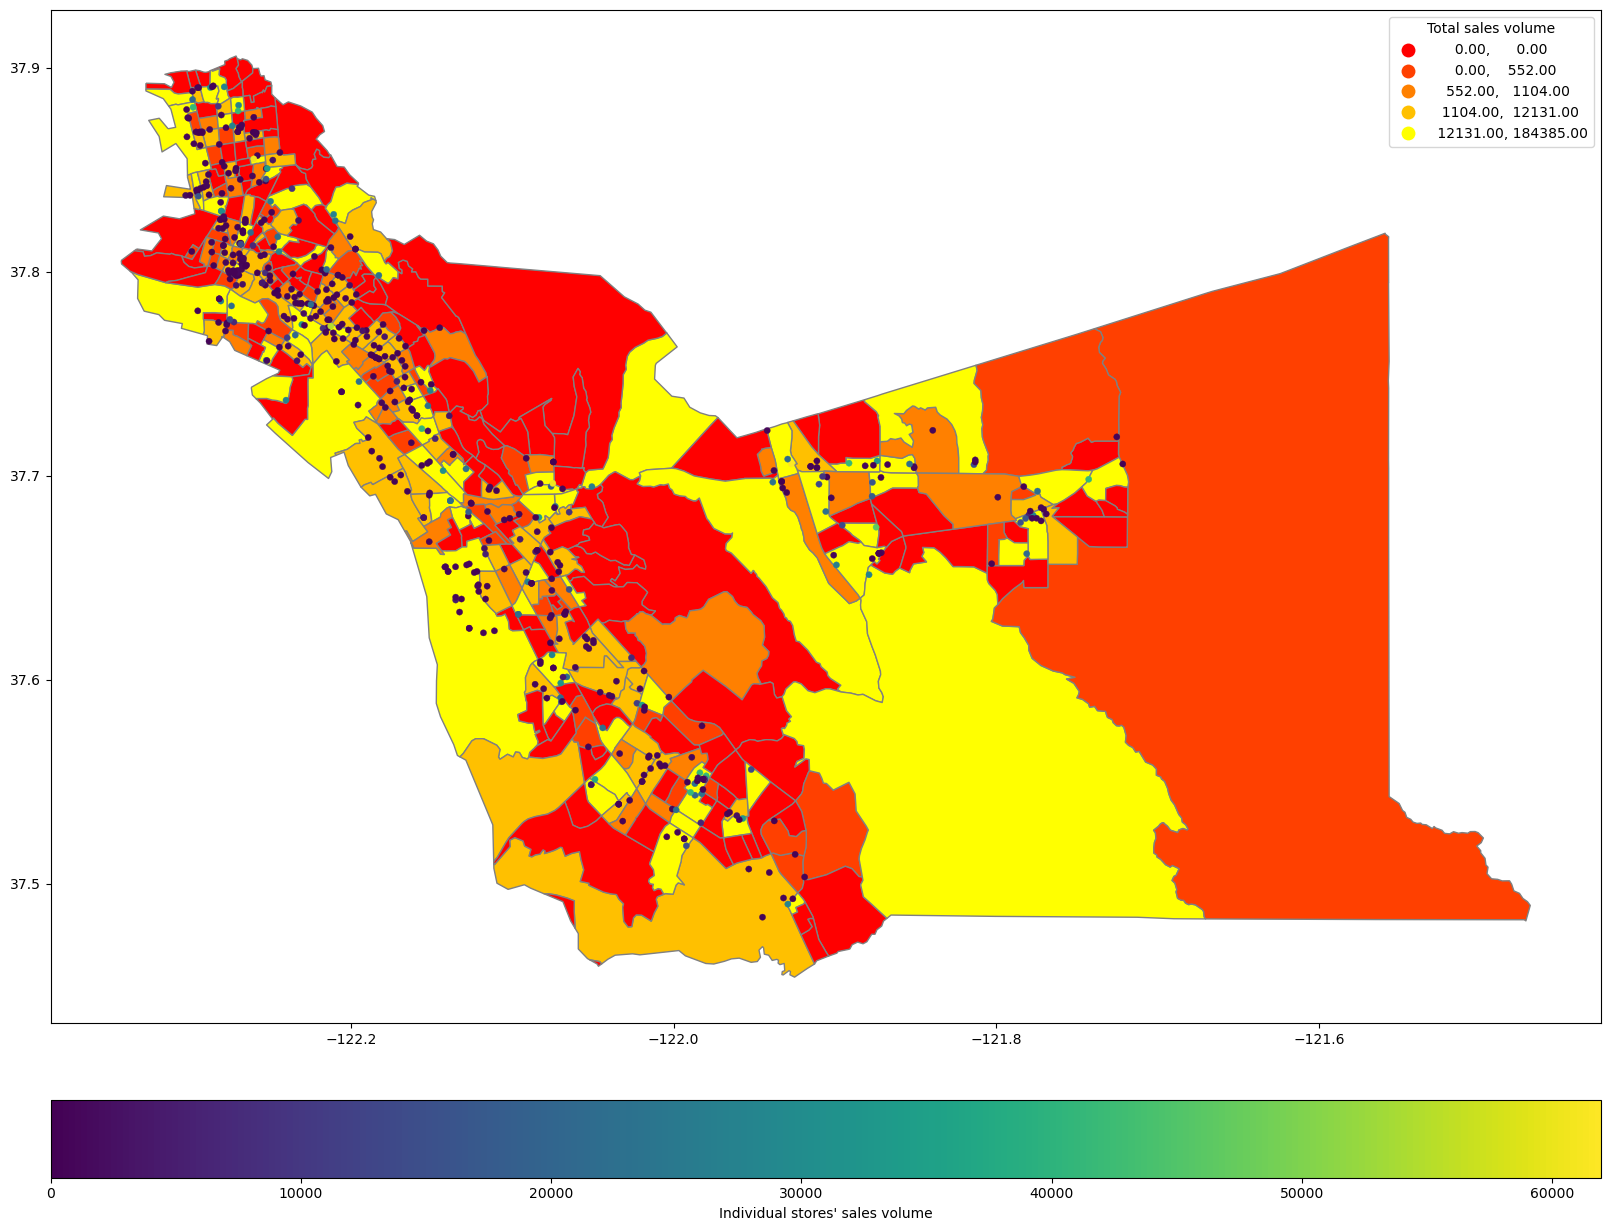

In [24]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (20,20)) 
# Plot the tracts, coloring by total SALESVOL
tracts_totsalesvol.plot(ax=ax,
                        column="SALESVOL",
                        scheme="quantiles",
                        cmap="autumn",
                        edgecolor="grey",
                        legend=True,
                        legend_kwds={'title': "Total sales volume"})

# Add the grocery stores, coloring by SALESVOL, for a visual check
grocery_pts_gdf_ac.plot(ax=ax,
                        column="SALESVOL",
                        cmap="viridis",
                        linewidth=0.25,
                        markersize=20,
                        legend=True,
                        legend_kwds={'label': "Individual stores' sales volume",
                                     'orientation': 'horizontal',
                                     'pad': 0.05})

# You Made It! Thanks for Joining Us for Python Geospatial Fundamentals!

<img src="https://statmodeling.stat.columbia.edu/wp-content/uploads/2016/07/cat-globe.png">